# Contour Detection In OpenCV 101 (1/3): The Basics

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(3595, 4793)


(np.float64(-0.5), np.float64(4792.5), np.float64(3594.5), np.float64(-0.5))

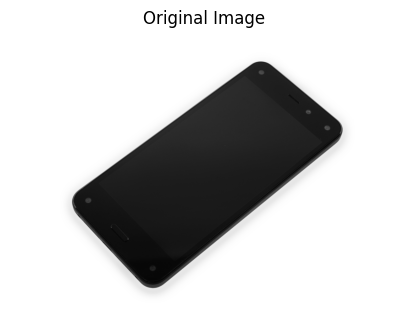

In [3]:
gray_image = cv2.imread(r'C:\projects\ai_quality_inspection\notebook\phnoe_img.jpg', 0)
print(gray_image.shape)

#display the image 
plt.figure(figsize=[5,5])
plt.imshow(gray_image, cmap='gray');plt.title("Original Image");plt.axis("off")

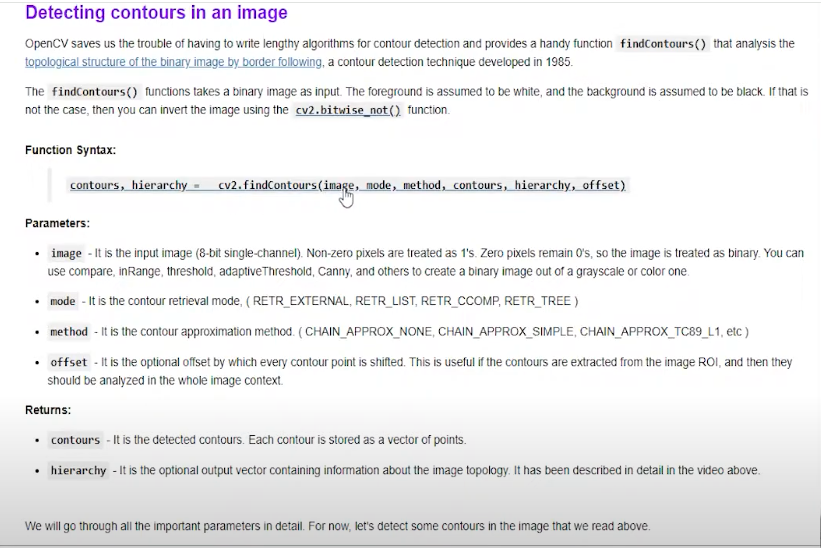

In [4]:
# we need to convert image into binary format before contour
# grey scale ---> threshold or canny edge detection --->contour

# if the image is already preprossed
contours, hierarchy = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Display the total number of contours found
print("Number of contour found = {}".format(len(contours)))

Number of contour found = 1


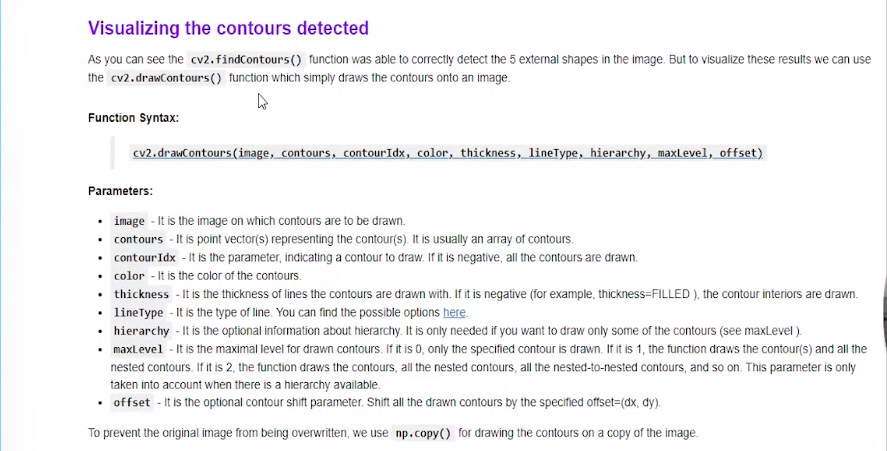

(np.float64(-0.5), np.float64(4792.5), np.float64(3594.5), np.float64(-0.5))

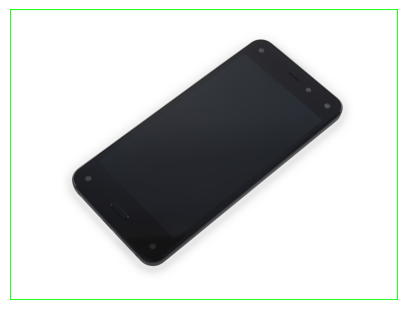

In [6]:
image1_copy = cv2.imread(r'C:\projects\ai_quality_inspection\notebook\phnoe_img.jpg')

#draw all the contours 
cv2.drawContours(image1_copy, contours, -1, (0,255,0), 20)  # -1 for all contours, #20 is for thickness line

plt.figure(figsize=[5,5])
plt.imshow(image1_copy[:,:,::-1]);plt.axis("off")

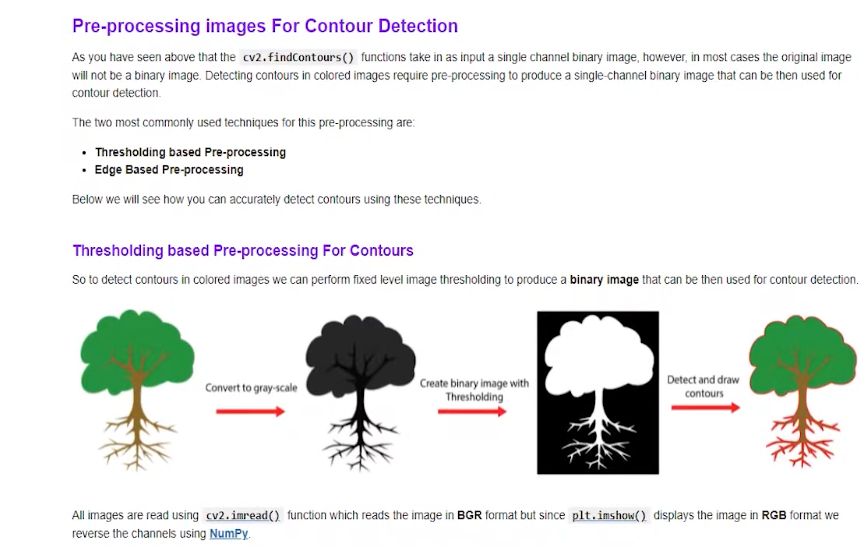

(np.float64(-0.5), np.float64(4792.5), np.float64(3594.5), np.float64(-0.5))

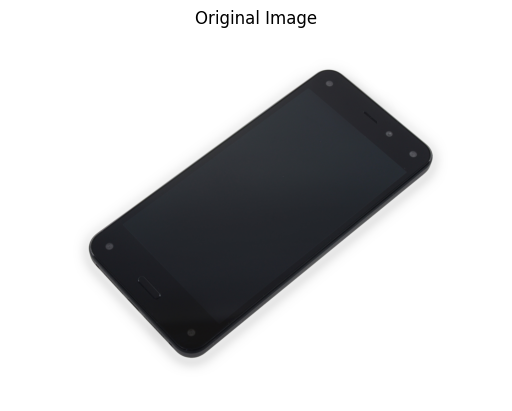

In [7]:
image2 = cv2.imread(r'C:\projects\ai_quality_inspection\notebook\phnoe_img.jpg')
plt.imshow( image2[:,:,::-1]);plt.title("Original Image");plt.axis("off")

#opencv reads image in bgr mode but matplotlib reads in rgb mode so to convert bgr to rgb we use [:,:,::-1]

(np.float64(-0.5), np.float64(4792.5), np.float64(3594.5), np.float64(-0.5))

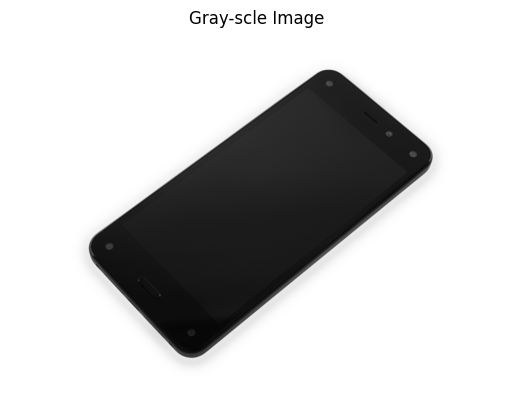

In [8]:
image2_copy = image2.copy()

# convert the image to grayscle
gray = cv2.cvtColor(image2_copy, cv2.COLOR_BGR2GRAY)  # here we can convert BGR2RGB 

#Display the result
plt.imshow(gray, cmap="gray");plt.title("Gray-scle Image");plt.axis("off")

(np.float64(-0.5), np.float64(4792.5), np.float64(3594.5), np.float64(-0.5))

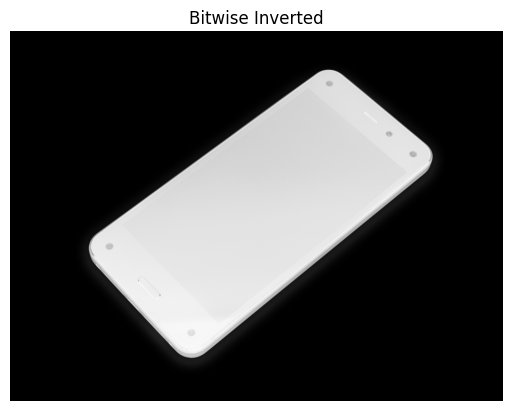

In [9]:
# here foreground should be white and background should be black

# Invert the colours
gray_inverted = cv2.bitwise_not(gray)

#Display the result
plt.imshow(gray_inverted, cmap="gray");plt.title("Bitwise Inverted");plt.axis('off')

(np.float64(-0.5), np.float64(4792.5), np.float64(3594.5), np.float64(-0.5))

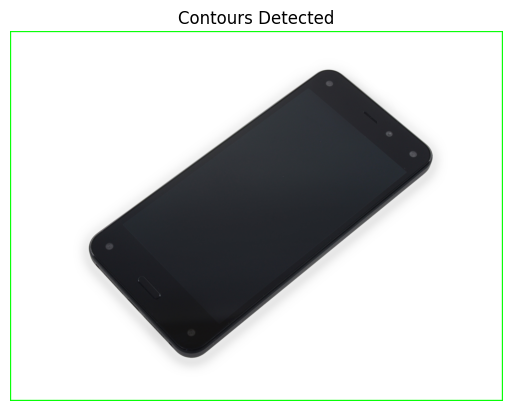

In [10]:
# find contours of inverted gray-sclae image
contours, hierarchy = cv2.findContours(gray_inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#draw all contours
cv2.drawContours(image2_copy, contours, -1, (0,255,0), 20)  # -1 for all contours, #20 is for thickness line

plt.imshow(image1_copy[:,:,::-1]);plt.title("Contours Detected");plt.axis("off")


(np.float64(-0.5), np.float64(4792.5), np.float64(3594.5), np.float64(-0.5))

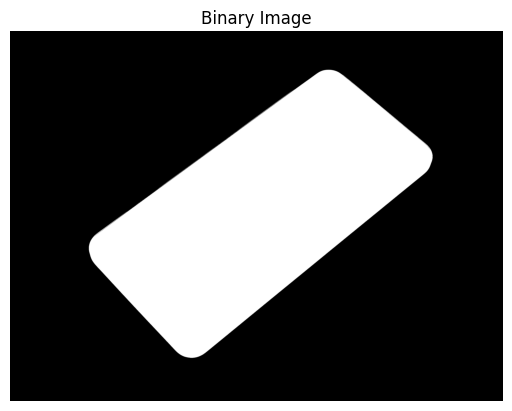

In [11]:
# we have not  thresholding

#create a binary threshold image
_, binary = cv2.threshold(gray_inverted, 100, 255, cv2.THRESH_BINARY)

#Display the result
plt.imshow(binary, cmap='gray');plt.title("Binary Image");plt.axis("off")

(np.float64(-0.5), np.float64(4792.5), np.float64(3594.5), np.float64(-0.5))

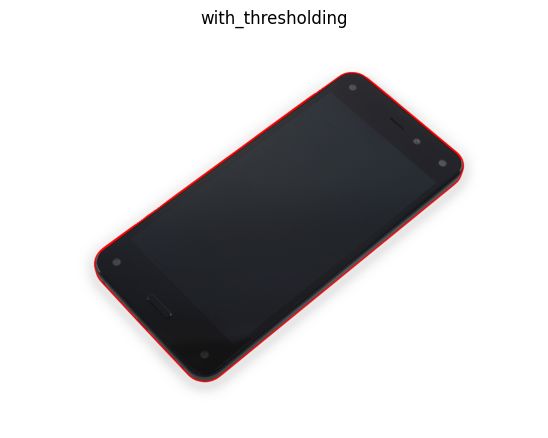

In [12]:
# make a copy of the source image
image2_copy2 = image2.copy()

#find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

#draw all the contour found
image2_copy2 = cv2.drawContours(image2_copy2, contours, -1, (0,0,255), 10)

# plot both of the result for comparison
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image2_copy[:,:,::-1]);plt.title("without_thresholding");plt.axis('off')
plt.subplot(121);plt.imshow(image2_copy2[:,:,::-1]);plt.title("with_thresholding");plt.axis('off')


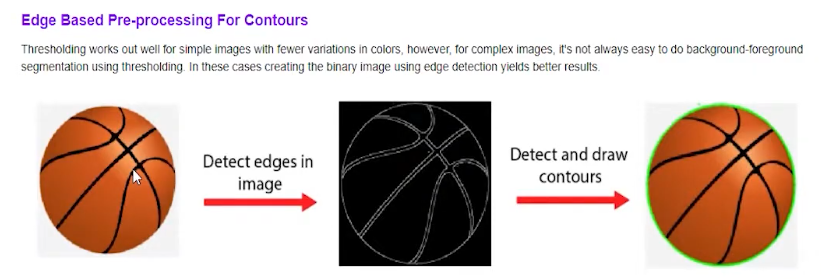


(np.float64(-0.5), np.float64(2559.5), np.float64(1439.5), np.float64(-0.5))

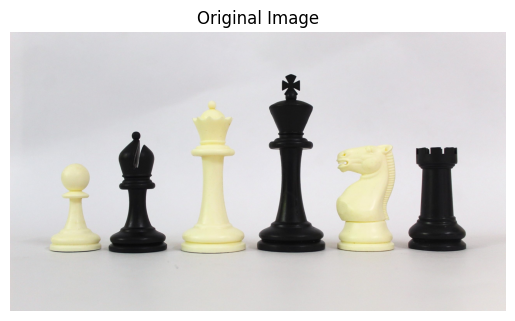

In [13]:
image3 = cv2.imread(r'C:\projects\ai_quality_inspection\notebook\edge_detection.jpg')

plt.imshow(image3[:,:,::-1]);plt.title("Original Image");plt.axis("off")

1. we will use function cv2.Canny() for detecting the edges in the image 
2. cv2.Canny() returns a single channel binary image which is all we need to perform contour detection in the next step.
2. we can also make use of cv2.GaussianBlur() function to remove noise from the image

(np.float64(-0.5), np.float64(2559.5), np.float64(1439.5), np.float64(-0.5))

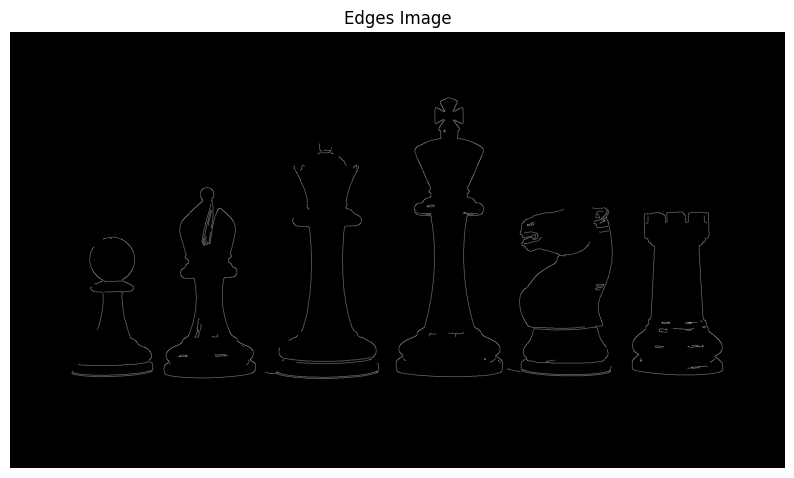

In [14]:
#blur the image to remove noise
blurred_image = cv2.GaussianBlur(image3.copy(),(9,9), 0)

#Apply canny edge detection
edges = cv2.Canny(blurred_image, 10, 75)

#Display the resultant binary image of edges
plt.figure(figsize=[10,10])
plt.imshow(edges,cmap='gray');plt.title("Edges Image");plt.axis('off')

(np.float64(-0.5), np.float64(2559.5), np.float64(1439.5), np.float64(-0.5))

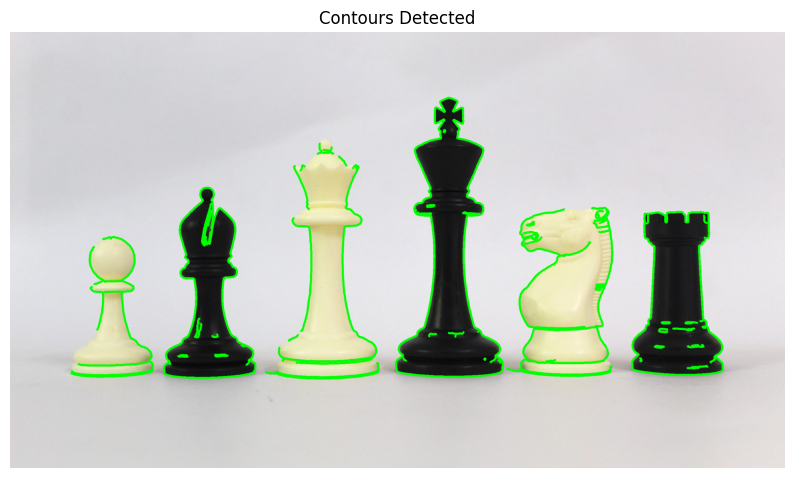

In [15]:
# detect the contour using the edges
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#draw the contour
image3_copy = image3.copy()
cv2.drawContours(image3_copy, contours, -1, (0, 255, 0), 5)

#Display the drawn contours
plt.figure(figsize=[10,10])
plt.imshow(image3_copy[:,:,::-1]);plt.title("Contours Detected");plt.axis('off')

In [16]:
"""
Contour Retrieval Mode
RETR_LIST. 
RETR_EXTERNAL. 
RETR_CCOMP. 
RETR_TREE.
"""

# check video if you forgot things
# https://www.youtube.com/watch?v=JfaZNiEbreE


'\nContour Retrieval Mode\nRETR_LIST. \nRETR_EXTERNAL. \nRETR_CCOMP. \nRETR_TREE.\n'